## Airbag and other influences on accident fatalities
### Description
US data, for 1997-2002, from police-reported car crashes in which there is a harmful event (people or property), and from which at least one vehicle was towed. Data are restricted to front-seat occupants, include only a subset of the variables recorded, and are restricted in other ways also.


1. dvcat: ordered factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+

2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities.

3. dead: factor with levels alive dead

4. airbag: a factor with levels none airbag

5. seatbelt: a factor with levels none belted

6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact

7. sex: a factor with levels f m

8. ageOFocc: age of occupant in years

9. yearacc: year of accident

10. yearVeh: Year of model of vehicle; a numeric vector

11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy nodeploy unavail

12. occRole: a factor with levels driver pass

13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.

14. injSeverity: a numeric vector; 0:none, 1:possible injury, 2:no incapacity, 3:incapacity, 4:killed; 5:unknown, 6:prior death

15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.


dataset link: https://rdrr.io/cran/DAAG/man/nassCDS.html 


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
import numpy as np
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.io as pio
%matplotlib inline
uncleaned_data = pd.read_csv('Accidents Airbag data.csv')
uncleaned_data.head(20)

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1
5,6,40-54,25.069,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,0,3.0,2:11:2
6,7,55+,27.078,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,0,3.0,2:13:1
7,8,55+,27.078,dead,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
8,9,10-24,812.869,alive,none,belted,0,m,40,1997,1984.0,unavail,driver,0,1.0,2:14:1
9,10,10-24,812.869,alive,none,belted,1,f,18,1997,1987.0,unavail,driver,0,0.0,2:14:2


columns 'Unnamed: 0','caseid','frontal','weight','occRole' do carry inconsistensies or the values do not provide a clear picture for analysis or are not needed for the analysis hence, needs to be removed.
for instance: 
1. caseid: is not required.
2. weights: do provide any useful information.
3. frontal: does tell us if the impact was from front or back but lack the information regarding who collided whom.
4. occRole: a factor with levels driver or a passenger.



In [2]:
uncleaned_data.drop(['Unnamed: 0','caseid','frontal','weight','occRole'], axis=1, inplace=True)
uncleaned_data

,dvcat,dead,airbag,seatbelt,sex,ageOFocc,yearacc,yearVeh,abcat,deploy,injSeverity
0,25-39,alive,none,belted,f,26,1997,1990.0,unavail,0,3.0
1,10-24,alive,airbag,belted,f,72,1997,1995.0,deploy,1,1.0
2,10-24,alive,none,none,f,69,1997,1988.0,unavail,0,4.0
3,25-39,alive,airbag,belted,f,53,1997,1995.0,deploy,1,1.0
4,25-39,alive,none,belted,f,32,1997,1988.0,unavail,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
26212,25-39,alive,none,belted,m,17,2002,1985.0,unavail,0,0.0
26213,10-24,alive,airbag,belted,m,54,2002,2002.0,nodeploy,0,2.0
26214,10-24,alive,airbag,belted,f,27,2002,1990.0,deploy,1,3.0
26215,25-39,alive,airbag,belted,f,18,2002,1999.0,deploy,1,0.0


In [3]:
# for fetching the basic info of the dataset like null values and data types columnwise
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        26217 non-null  object 
 1   dead         26217 non-null  object 
 2   airbag       26217 non-null  object 
 3   seatbelt     26217 non-null  object 
 4   sex          26217 non-null  object 
 5   ageOFocc     26217 non-null  int64  
 6   yearacc      26217 non-null  int64  
 7   yearVeh      26216 non-null  float64
 8   abcat        26217 non-null  object 
 9   deploy       26217 non-null  int64  
 10  injSeverity  26064 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


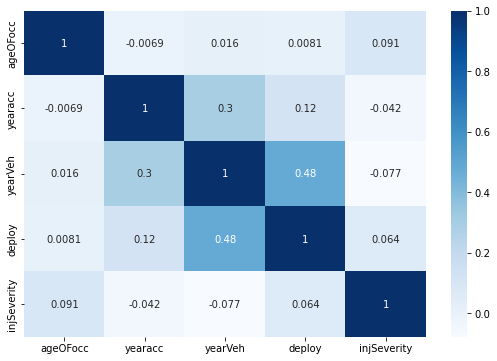

In [4]:
# Corelation of the Data
# df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(uncleaned_data.corr(), yticklabels='auto',annot=True, cmap='Blues')
plt.show()

Based on the above table. We can clearly say that the data is mildy correlated.

## Cleaning the Dataset

### Checking numerical data for sanity check

In [5]:
uncleaned_data.describe()

,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,26217.000000,26217.000000,26216.000000,26217.000000,26064.000000
mean,37.206202,1999.555556,1992.804699,0.337033,1.715508
std,17.909317,1.702546,5.594990,0.472705,1.293357
min,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,97.000000,2002.000000,2003.000000,1.000000,6.000000


### Checking for null values for sanity checks

In [6]:
uncleaned_data.isnull().sum()

dvcat            0
dead             0
airbag           0
seatbelt         0
sex              0
ageOFocc         0
yearacc          0
yearVeh          1
abcat            0
deploy           0
injSeverity    153
dtype: int64

In [7]:
data = uncleaned_data.dropna() #dropping null values from the dataset.

#### Confirming that there are no null values in the dataset

In [8]:

data.isnull().sum()

dvcat          0
dead           0
airbag         0
seatbelt       0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
deploy         0
injSeverity    0
dtype: int64

### Sanity check: Checking Unique values for categorical data 

In [9]:
data['sex'].unique()

array(['f', 'm'], dtype=object)

In [10]:
data['seatbelt'].unique()

array(['belted', 'none'], dtype=object)

In [11]:
data['dead'].unique()

array(['alive', 'dead'], dtype=object)

## General Visualisation of the Dataset

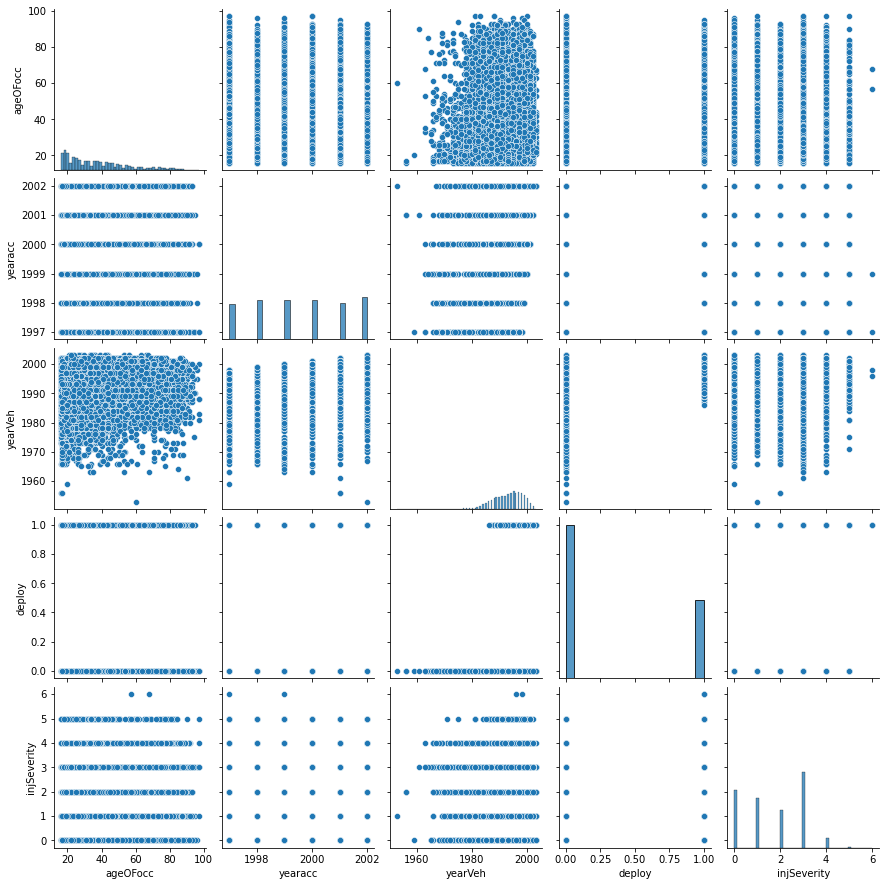

In [12]:
sns.pairplot(data)

### unique values for year of accident with respect to injury severity 

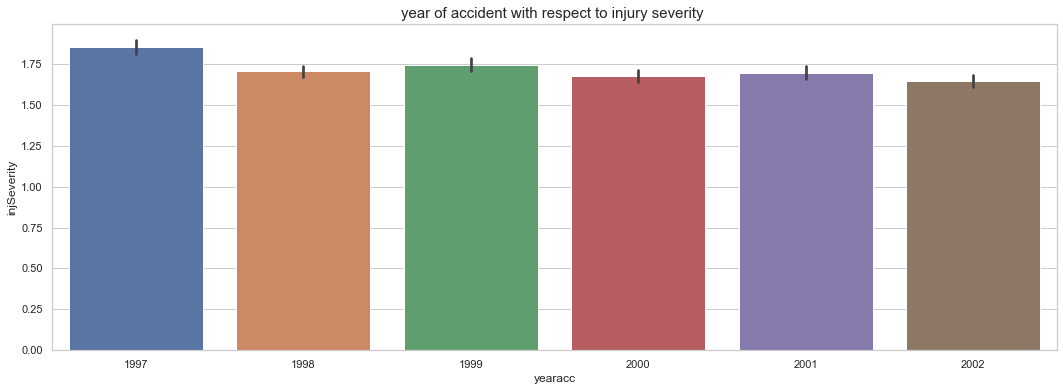

In [29]:
plt.figure(figsize=(18,6))
sns.set_theme(style= 'whitegrid')
sns.barplot(x=data.yearacc, y=data.injSeverity)
plt.title("year of accident with respect to injury severity ", fontsize=15)
plt.show()

As we can see from the bars plotted, all the years share similar number data points. 

Text(0.5, 1.0, 'Ratio of airbags getting Deployed')

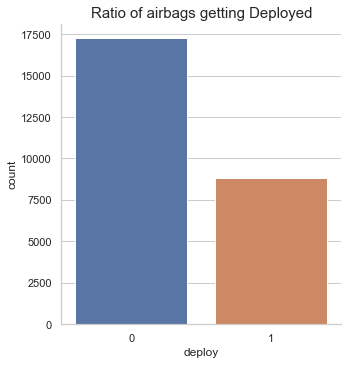

In [14]:
sns.catplot(x='deploy', kind="count", data=data) 
plt.title('Ratio of airbags getting Deployed', fontsize=15)

In the above graph, we can see that about 66 % of the observed data, the airbags were not deployed. 

Text(0.5, 1.0, 'Passengers wearing Seatbelts')

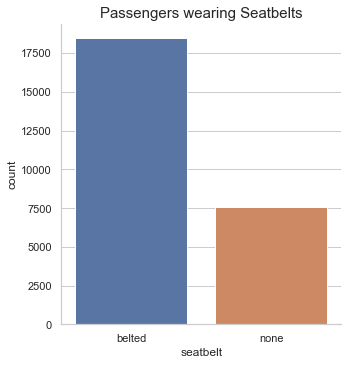

In [15]:
sns.catplot(x='seatbelt', kind="count", data=data) 
plt.title('Passengers wearing Seatbelts', fontsize=15)

The above graph display if the passengers were wearing seatbelts or not. About 70% were wearing seatbelts.

Text(0.5, 1.0, 'Passengers who survived the accidents ')

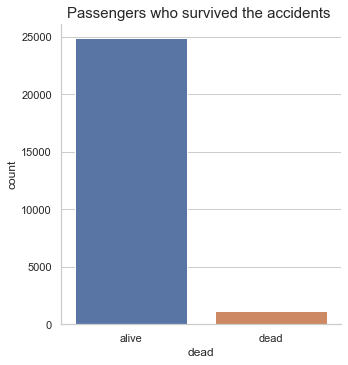

In [16]:
sns.catplot(x='dead', kind="count", data=data) 
plt.title('Passengers who survived the accidents ', fontsize=15)

As we can see from the bars plotted, maximum number of people were able to survive the accidents.

## Does Airbags save Lives ? 

To answer this question we need to check certain parameters.

### Availability of Airbags in Vehicles

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


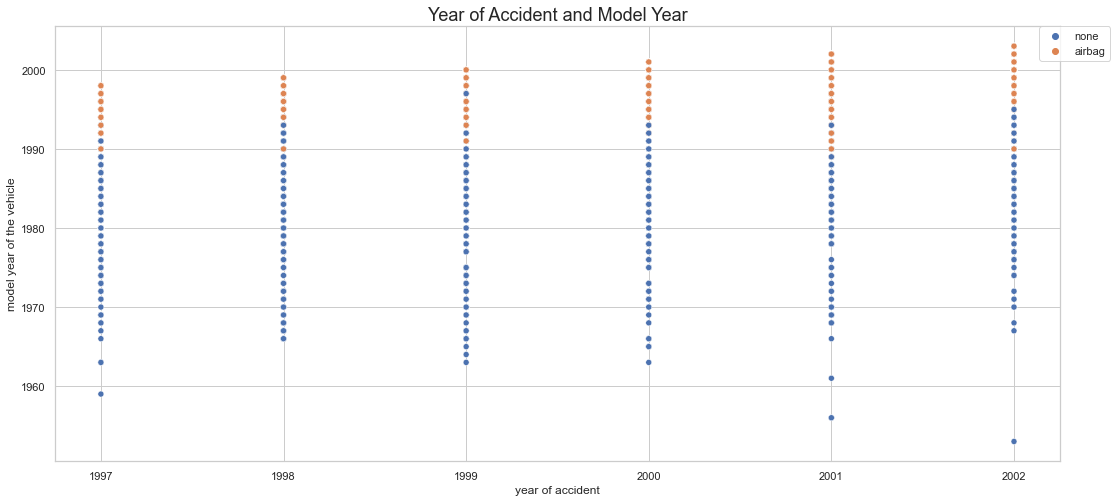

In [17]:
plt.figure(figsize=(18,8))
sns.scatterplot( data['yearacc'],data['yearVeh'],hue=data['airbag'])
plt.title('Year of Accident and Model Year', fontsize = 18)
plt.xlabel('year of accident')
plt.ylabel('model year of the vehicle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
plt.show()

#### From the above graph we can see the following observations.
1. We can see the observed data is for year of accident is ranging from 1997 to 2002.
2. The model year of the vehicle is ranging from 1960's to 2000's.
3. The above graph shows that most of the cars in the observed data did not have airbags. We can clearly see that older models that is, before year '1990' did not have airbags whereas, newer vehicles do have the availability of airbags.


### Severity of Injury 

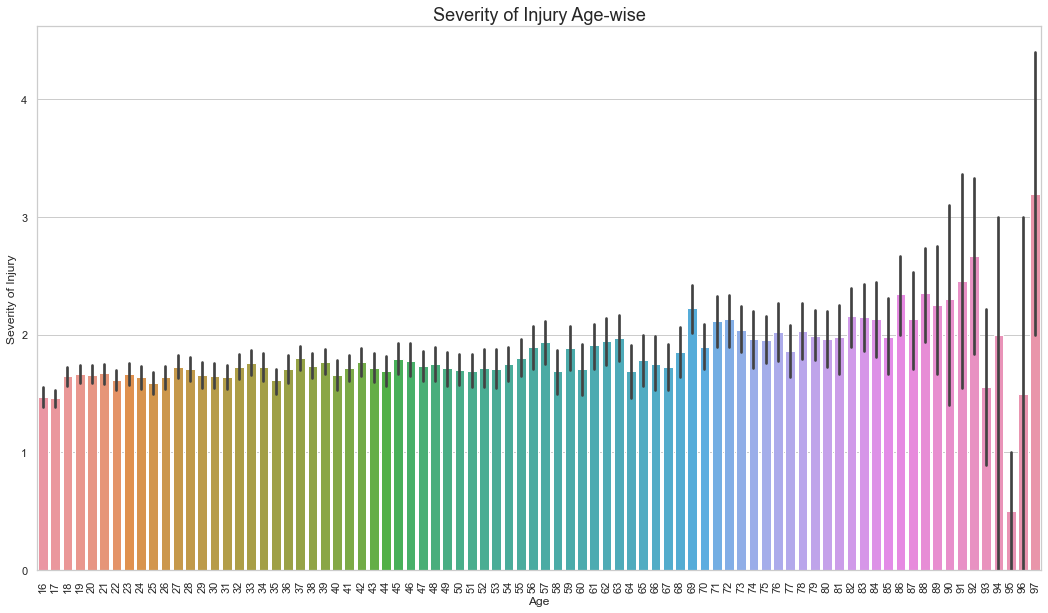

In [18]:
plt.figure(figsize=(18,10))
sns.barplot(x="ageOFocc", y="injSeverity", data=data)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Severity of Injury')
plt.title('Severity of Injury Age-wise',fontsize = 18)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
plt.show()

1. The above graph shows that older people tend to have worse injuries than younger people.
2. Age does seem to have outliers or misleading data with ages as high as 97 but can be true also.

### Vehicles in which Airbags were Deployed. 

In [19]:
vehicle_with_airbag = data[data['deploy']== 1] 

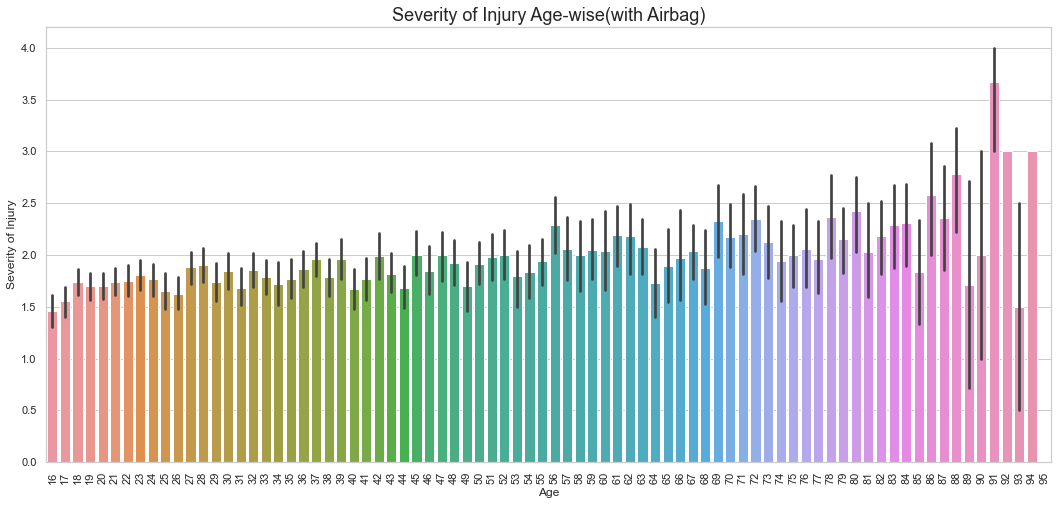

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x="ageOFocc", y="injSeverity", data=vehicle_with_airbag)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Severity of Injury')
plt.title('Severity of Injury Age-wise(with Airbag)',fontsize = 18)
plt.show()

### Vehicles in which Airbags were not Deployed. 

In [21]:
vehicle_without_airbag = data[data['deploy']== 0] 

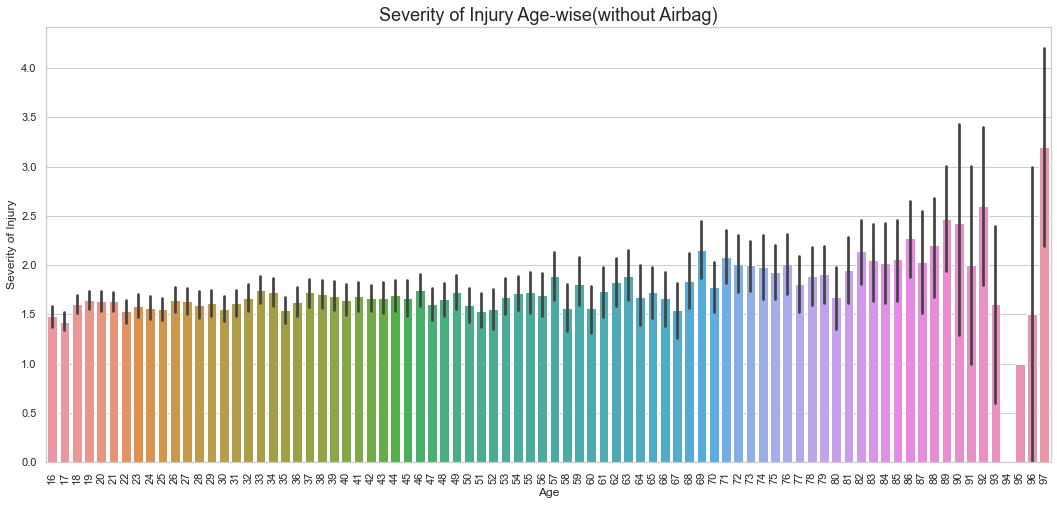

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(x="ageOFocc", y="injSeverity", data=vehicle_without_airbag)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Severity of Injury')
plt.title('Severity of Injury Age-wise(without Airbag)',fontsize = 18)
plt.show()

#### Based on the visualizations we can clearly observe that injury severity increases along with the age. Moreover, airbags do not affect the severity of accident significantly.  

### Effect of Speed at the time of collision.

<Figure size 720x1080 with 0 Axes>

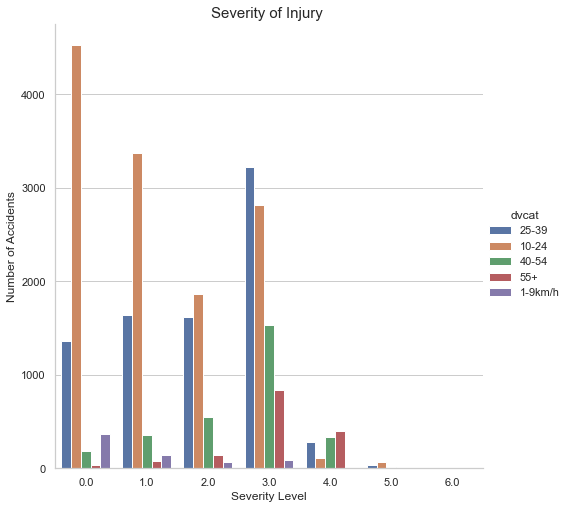

In [23]:
plt.figure(figsize=(10,15))
sns.catplot(x='injSeverity', kind="count",hue='dvcat', data=data,height=7)
plt.ylabel("Number of Accidents")
plt.xlabel("Severity Level")
plt.title('Severity of Injury ', fontsize=15)
plt.show()

#### the graph shows following observations.
1. People were less injured if the accident occured on a lower speed.
2. Accidents were more severe on higher speeds.
3. there are some incidents in which accidents happended on a lower speed but it can said as a limitation of the dataset thata we cannot identify the reason of collision. 

### Do people wear enough Seatbelts ?

#### for this analysis I have used the data when people died due to the accident or were severly injured.  

In [24]:
severity = data[data['injSeverity'] == 4.0] ## when they died 

Text(0.5, 1.0, 'Severity of Injury w.r.t. seatbelt ')

<Figure size 720x432 with 0 Axes>

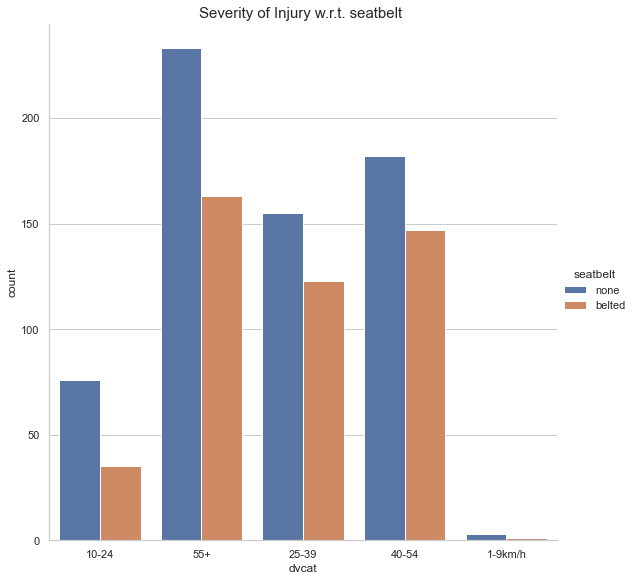

In [25]:
plt.figure(figsize=(10,6))
sns.catplot(x='dvcat', kind="count",hue='seatbelt', data=severity,height= 8) 
plt.title('Severity of Injury w.r.t. seatbelt ', fontsize=15)


#### The above graph shows that most of the people who met with an accident don't tend to wear seatbelt.

Text(0.5, 1.0, 'Deployment of Airbags When People Died  ')

<Figure size 720x432 with 0 Axes>

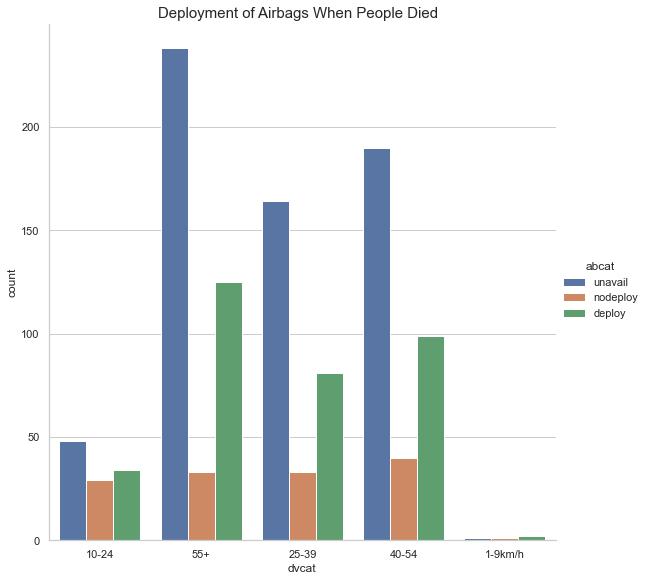

In [26]:
plt.figure(figsize=(10,6))
sns.catplot(x='dvcat', kind="count",hue='abcat', data=severity, height= 8) 
plt.title('Deployment of Airbags When People Died  ', fontsize=15)

#### The above graph shows only the people who did not survive the accident and below are the observations.
1. This graph shows in most of the cases the airbags were not deployed.
2. Even at the top speeds either the Airbags were not deployed or were unavailable.

Text(0.5, 1.0, 'Severity of Injury w.r.t. seatbelt ')

<Figure size 720x432 with 0 Axes>

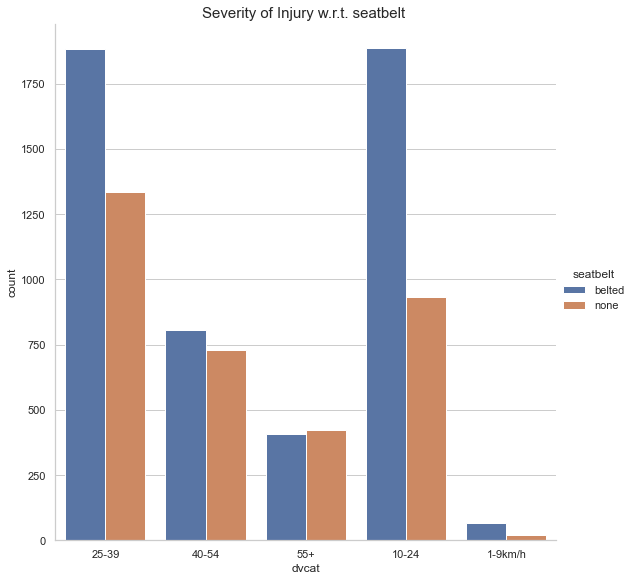

In [27]:
severity = data[data['injSeverity'] == 3.0] #when they suffeed incapacity
plt.figure(figsize=(10,6))
sns.catplot(x='dvcat', kind="count",hue='seatbelt', data=severity,height= 8) 
plt.title('Severity of Injury w.r.t. seatbelt ', fontsize=15)


#### In this graph most people didn't wear seatbelts when they were at slower speed but were still heavily injured

Text(0.5, 1.0, 'Deployment of Airbags When People were Severly Injured')

<Figure size 720x432 with 0 Axes>

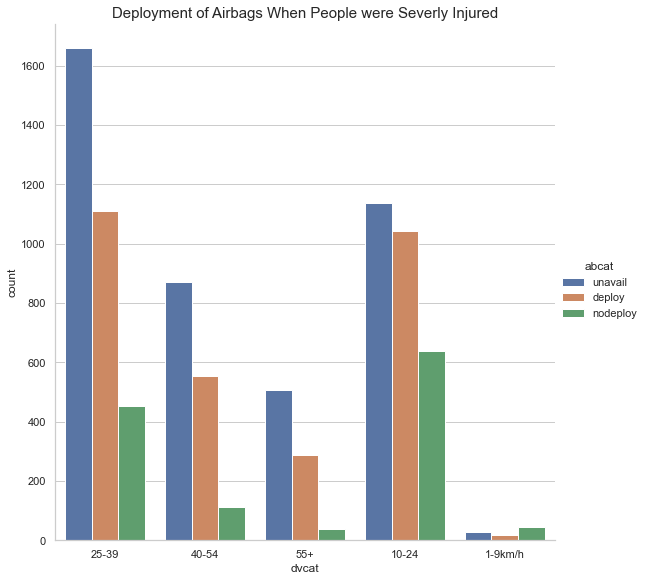

In [28]:
plt.figure(figsize=(10,6))
sns.catplot(x='dvcat', kind="count",hue='abcat', data=severity, height= 8) 
plt.title('Deployment of Airbags When People were Severly Injured', fontsize=15)

#### The above graph shows only the people who were severly injured by the accident and below are the observations.
1. In most cases the airbags were not deployed.
2. Even if the airbags were deployed there has been lot of severe injuries and airbags were not able to prevent them. 

## Conclusion.

After all the analysis, I have reached to the conclusion that their are many factors that can contribute in saving a life for example, the age of the person, Speed of the vehicle or if the passengers were wearing seatbelts or not. 

Most of the observed data shows that the airbag sometimes are not even deployed when required which led to incapicity or even death in some cases. A major factor which helps us to analyze the data better is to the severity of injury at various level and the above visualizations shows us that even if the severity is a major one i.e, death the airbags were either not present or not deployed.

Even if the airbags were deployed there has been lot of severe injuries and airbags were not able to prevent them, Which concludes that airbags might have helped in reducing the severity of injury but we don't have enough information on that part which can be said as a limitaion of the dataset. Although, wearing seatbelts is a factor which does show that injuries might have occured less severly. If people wore more seatbelts as in many cases of incapacity and deaths it can be seen that people were not wearing seatbelts.